# Optical depth EPL+SHEAR model validation

* This notebook shows example how to use the `OpticalDepth` class to create an optical depth distribution for a 'SIE' model and make comparison with various models.

* You can change model or model parameters and compare the results.

### Optical depth for EPL+Shear lens

Take $P(SL|z_s, z_l, \theta_L)$ as $\phi_{\text{EPL}}$ and $\theta_L \in$ {$\sigma$ (velocity-dispersion), $q$ (axis-ratio), $\psi$ (axis-rotation), $\gamma$ (mass density spectral-index), $[\gamma_1,\gamma_2]$ (external-shear), $[e_1,e_2]$ (ellipticity)}.

\begin{equation}
\begin{split}
P(SL|z_s) &= \frac{\Delta z_l \Delta \sigma}{4\pi} \left< \phi_{\text{EPL}}\; \phi_(\sigma, z_l)\; \frac{dV_c}{dz_l}\right>_{\sigma\in P_o(\sigma)\, z_l\in P_o(z_l)\, q\in P(q) \, \psi\in P(\psi) \, \gamma\in P(\gamma) \, \gamma_1,\gamma_2\in P(\gamma_1,\gamma_2) \, e_1,e_2\in P(e_1,e_2)}
\end{split} \tag{12a}
\end{equation}

where P_o(\sigma) and P_o(z_l) are the uniform distribution, and $P(q)$, $P(\psi)$, $P(\gamma)$, $P(\gamma_1,\gamma_2)$, $P(e_1,e_2)$ are the astrophysical PDF of the respective lens parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
from ler.lens_galaxy_population import OpticalDepth

Setting multiprocessing start method to 'fork'


In [2]:
od_sis_gengamma = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="sis_galaxy",
    optical_depth_function="optical_depth_sis_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",  # zl dependent velocity dispersion
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min = 50., vd_max = 420., alpha = 2.32, beta = 2.67, phistar = 8.0e-3*cosmo.h**3, sigmastar = 161.0),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=False,
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_gengamma_3.pickle
axis_ratio sampler: CPUDispatcher(<function axis_ratio_SIS at 0x343618820>) has been set.
optical_depth_sis_numerical interpolator will be loaded from ./interpolator_json/optical_depth_sis_numerical/optical_depth_sis_numerical_13.pickle
Chosen velocity dispersion sampler: velocity_dispersion_gengamma
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd

In [3]:
od_sie_gengamma = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="sie_galaxy",
    optical_depth_function="optical_depth_sie_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min = 50., vd_max = 420., alpha = 2.32, beta = 2.67, phistar = 8.0e-3*cosmo.h**3, sigmastar = 161.0),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=False,
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_gengamma_3.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_rayleigh_0.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.sampler at 0x34744aef0>) has been set.
optical_depth_sie_numerical interpolator will be loaded from ./inte

In [4]:
od_sie_bernardi = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="sie_galaxy",
    optical_depth_function="optical_depth_sie_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=False,
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_bernardi_7.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_rayleigh_0.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.sampler at 0x34744b9a0>) has been set.
optical_depth_sie_numerical interpolator will be loaded from ./inte

In [5]:
od_sie_ewoud = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="sie_galaxy",
    optical_depth_function="optical_depth_sie_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=False,
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_ewoud_8.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_rayleigh_0.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.sampler at 0x34744a290>) has been set.
optical_depth_sie_numerical interpolator will be loaded from ./interpolat

In [6]:
from astropy.cosmology import Planck18

od_sie_ewoud_plack18 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="sie_galaxy",
    optical_depth_function="optical_depth_sie_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(Planck18.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=Planck18,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=False,
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_5.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_5.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_5.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_5.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_ewoud_9.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/axis_ratio/axis_ratio_rayleigh_0.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.sampler at 0x35109d630>) has been set.
optical_depth_sie_numerical interpolator will be loaded from ./interpolat

In [11]:
od_epl_ewoud = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="epl_shear_galaxy",
    optical_depth_function="optical_depth_epl_shear_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=False,
)


Initializing OpticalDepth class

z_to_Dc interpolator will be generated at ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be generated at ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be generated at ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.<lambda> at 0x35342ef80>) has been set.
Using pre-gererated optical depth function.
  funtion_name: optical_depth_epl_shear_hemanta.
  velocity_dispersion: velocity_dispersion_ewoud
  axis_ratio: axis_ratio_rayleigh
optical_depth_epl_shear_hemanta interpolator will be gener

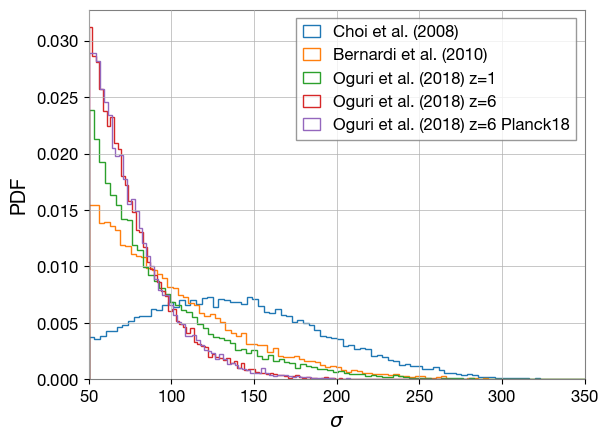

In [7]:
sigma_gengamma = od_sie_gengamma.sample_velocity_dispersion(20000)
sigma_bernardi = od_sie_bernardi.sample_velocity_dispersion(20000)
sigma_ewoud_1p0 = od_sie_ewoud.sample_velocity_dispersion(20000, 1*np.ones(20000))
sigma_ewoud_6p0 = od_sie_ewoud.sample_velocity_dispersion(20000, 6*np.ones(20000))
sigma_ewoud_6p0_planck18 = od_sie_ewoud_plack18.sample_velocity_dispersion(20000, 6*np.ones(20000))

plt.hist(sigma_gengamma, bins=100, histtype='step', density=True, label='Choi et al. (2008)')
plt.hist(sigma_bernardi, bins=100, histtype='step', density=True, label='Bernardi et al. (2010)')
plt.hist(sigma_ewoud_1p0, bins=100, histtype='step', density=True, label='Oguri et al. (2018) z=1')
plt.hist(sigma_ewoud_6p0, bins=100, histtype='step', density=True, label='Oguri et al. (2018) z=6')
plt.hist(sigma_ewoud_6p0_planck18, bins=100, histtype='step', density=True, label='Oguri et al. (2018) z=6 Planck18')

plt.xlim(50, 350)
plt.xlabel(r'$\sigma$')
plt.ylabel('PDF')
plt.legend()
plt.show()

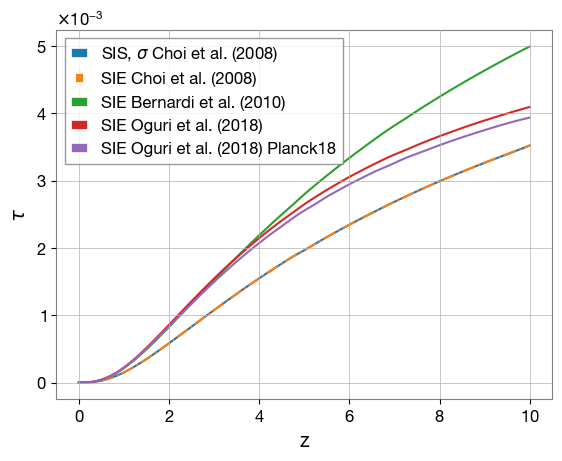

In [8]:
# plot the optical depth
zs = np.linspace(0.0, 10, 100)
tau_sis_gengamma = od_sis_gengamma.strong_lensing_optical_depth(zs)
#tau_sis_gengamma = od_sis_gengamma.optical_depth_sis_haris(zs)
tau_sie_gengamma = od_sie_gengamma.strong_lensing_optical_depth(zs)
tau_sie_bernardi = od_sie_bernardi.strong_lensing_optical_depth(zs)
tau_sie_ewoud = od_sie_ewoud.strong_lensing_optical_depth(zs)
#tau_epl_ewoud = od_epl_ewoud.strong_lensing_optical_depth(zs)
tau_sie_ewoud_planck18 = od_sie_ewoud_plack18.strong_lensing_optical_depth(zs)

plt.plot(zs, tau_sis_gengamma, label=r'SIS, $\sigma$ Choi et al. (2008)')
plt.plot(zs, tau_sis_gengamma, label=r'SIE Choi et al. (2008)', linestyle='-.')
plt.plot(zs, tau_sie_bernardi, label='SIE Bernardi et al. (2010)')
plt.plot(zs, tau_sie_ewoud, label='SIE Oguri et al. (2018)')
#plt.plot(zs, tau_epl_ewoud, label='EPL+SHEAR Oguri et al. (2018)')
plt.plot(zs, tau_sie_ewoud_planck18, label='SIE Oguri et al. (2018) Planck18')

plt.xlabel('z')
plt.ylabel(r'$\tau$')
plt.legend()
plt.show()

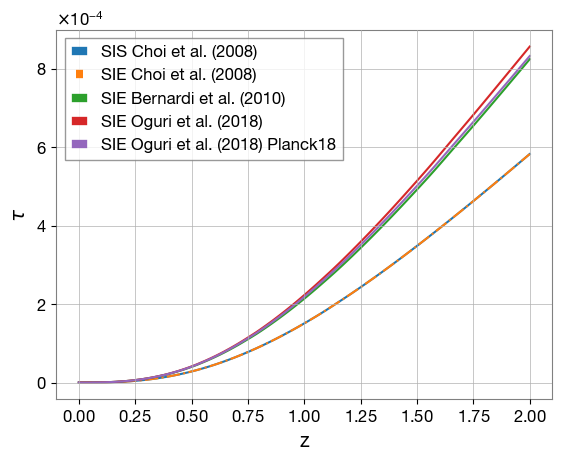

In [9]:
# plot the optical depth
zs = np.linspace(0.0, 2, 100)
tau_sis_gengamma = od_sis_gengamma.strong_lensing_optical_depth(zs)
tau_sie_gengamma = od_sie_gengamma.strong_lensing_optical_depth(zs)
tau_sie_bernardi = od_sie_bernardi.strong_lensing_optical_depth(zs)
tau_sie_ewoud = od_sie_ewoud.strong_lensing_optical_depth(zs)
#tau_epl_ewoud = od_epl_ewoud.strong_lensing_optical_depth(zs)
tau_sie_ewoud_planck18 = od_sie_ewoud_plack18.strong_lensing_optical_depth(zs)

plt.plot(zs, tau_sis_gengamma, label='SIS Choi et al. (2008)')
plt.plot(zs, tau_sis_gengamma, label='SIE Choi et al. (2008)', linestyle='-.')
plt.plot(zs, tau_sie_bernardi, label='SIE Bernardi et al. (2010)')
plt.plot(zs, tau_sie_ewoud, label='SIE Oguri et al. (2018)')
#plt.plot(zs, tau_epl_ewoud, label='EPL+SHEAR Oguri et al. (2018)')
plt.plot(zs, tau_sie_ewoud_planck18, label='SIE Oguri et al. (2018) Planck18')

plt.xlabel('z')
plt.ylabel(r'$\tau$')
plt.legend()
plt.show()

In [31]:
od_epl_ewoud = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="epl_shear_galaxy",
    optical_depth_function="optical_depth_EPL_SHEAR_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=False,
)
# 16% 32mins, 8 cores


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
optical_depth_EPL_SHEAR_numerical interpolator will be generated at ./interpolator_json/optical_depth_EPL_SHEAR_numerical/optical_depth_EPL_SHEAR_numerical_0.pickle
Computing optical depth with multiprocessing...


 17%|██████████▍                                                 | 52/298 [35:12<2:46:32, 40.62s/it]


KeyboardInterrupt: 

In [3]:
od_epl_ewoud_numerical = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="epl_shear_galaxy",
    optical_depth_function="optical_depth_epl_shear_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=True, resolution=100))
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.<lambda> at 0x35188beb0>) has been set.
optical_depth_epl_shear_numerical interpolator will be generated at ./interpolator_json/optical_depth_epl_shear_numerical/optical_depth_epl_shear_numerical_1.pickle
Computing optical depth with multiprocessing...


 29%|████████████████                                        | 57/198 [5:08:28<12:43:03, 324.71s/it]


KeyboardInterrupt: 